<a href="https://colab.research.google.com/github/SamilG2/challenge-telecomx-01/blob/main/TelecomX01_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telecom X - Análisis de Evasión de Clientes**

La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

El ánalisis contiene:

*   Importación y manipulación de datos desde una API.
*   Aplicación de los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
*   Creación de visualizaciones estratégicas para identificar patrones y tendencias.
*   Análisis Exploratorio de Datos (EDA) e informe con insights relevantes.


#📌 Extracción

In [ ]:
import pandas as pd
import requests
import json

In [ ]:
# Acceso a la API
df = requests.get('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

# Resultados
resultado = json.loads(df.text)

# Visualización del dataframe
df = pd.DataFrame(resultado)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
df_plano = pd.json_normalize(resultado)
df_plano

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

In [ ]:
# Verificar los tipos de datos de cada columna
df_plano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [ ]:
# Verifique si hay valores únicos en cada columna
for col in df_plano.columns:
  print(f"valores únicos en la columna'{col}': {df_plano[col].nunique()}")
  if df_plano[col].nunique() < 50: # Imprima los valores solamente si no hay muchos
    print(df_plano[col].unique())
    print('-' * 50)  # Línea divisoria para mejor visualización

valores únicos en la columna'customerID': 7267
valores únicos en la columna'Churn': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'customer.gender': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'customer.SeniorCitizen': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'customer.Partner': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.Dependents': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'customer.tenure': 73
valores únicos en la columna'phone.PhoneService': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------
valores únicos en la columna'internet.InternetService': 3
['DSL' 'Fiber optic' 'No'

In [ ]:
#Duplicados
print("Numero de duplicados", df_plano.duplicated().sum())

Numero de duplicados 0


In [ ]:
# Nulos
print("Numero de Nulos", df_plano.isnull().sum())

Numero de Nulos customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [ ]:
# Vacíos o en blanco
df_plano.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
#Cambiando la columna "account.Charges.Total" a Float

df_plano['account.Charges.Total'] = pd.to_numeric(df_plano['account.Charges.Total'], errors='coerce')
print(df_plano['account.Charges.Total'].dtype)

float64


In [ ]:
# Eliminando las columnas de Churn

df_plano = df_plano[df_plano['Churn'].str.strip() != '']
print("Número de filas después de eliminar las vacías en 'Churn':", len(df_plano))

Número de filas después de eliminar las vacías en 'Churn': 7043


In [ ]:
# Vacíos o en blanco
df_plano.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [ ]:
# Columna de cuentas diarias
df_plano.loc[:, 'Cuentas_Diarias'] = df_plano['account.Charges.Monthly'] / 30
print(df_plano[['account.Charges.Monthly', 'Cuentas_Diarias']])

      account.Charges.Monthly  Cuentas_Diarias
0                       65.60         2.186667
1                       59.90         1.996667
2                       73.90         2.463333
3                       98.00         3.266667
4                       83.90         2.796667
...                       ...              ...
7262                    55.15         1.838333
7263                    85.10         2.836667
7264                    50.30         1.676667
7265                    67.85         2.261667
7266                    59.00         1.966667

[7043 rows x 2 columns]


In [ ]:
df_plano = df_plano.drop('Cuentas_Diarias', errors='ignore')

In [ ]:
df_plano

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


#📊 Carga y análisis

In [ ]:
df_plano.describe()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [ ]:
import plotly.express as px

In [ ]:
# Grafico para la distribución de la variable Churn
px.histogram(df_plano, x = 'customer.gender', text_auto = True, color = 'Churn', barmode = 'group')

In [ ]:
# Variable SeniorCitizen
px.histogram(df_plano, x = 'customer.SeniorCitizen', text_auto = True, color = 'Churn', barmode = 'group')

In [ ]:
# Variable meses de contrato
px.histogram(df_plano, x = 'customer.tenure', text_auto = True, color = 'Churn', barmode = 'group')

In [ ]:
# Agrupar por tenure y Churn
df_grouped = df_plano.groupby(['customer.tenure', 'Churn']).size().unstack(fill_value=0)

# Calcular el % de churn por tenure
df_grouped['churn_rate'] = (df_grouped.get('Yes', 0) / df_grouped.sum(axis=1)) * 100

# Mostrar el resultado
print(df_grouped[['churn_rate']])

Churn            churn_rate
customer.tenure            
0                  0.000000
1                 61.990212
2                 51.680672
3                 47.000000
4                 47.159091
...                     ...
68                 9.000000
69                 8.421053
70                 9.243697
71                 3.529412
72                 1.657459

[73 rows x 1 columns]


In [ ]:
fig = px.line(df_grouped.reset_index(),
              x='customer.tenure',
              y='churn_rate',
              markers=True,
              title='Tasa de Churn (%) por Tenure')
fig.show()

In [ ]:
px.scatter(df_plano,
           x="customer.tenure",
           y="account.Charges.Monthly",
           color="Churn",
           title="Tenure vs Cargos mensuales por Churn")

In [ ]:
px.histogram(df_plano, x = 'account.Contract', text_auto = True, color = 'Churn', barmode = 'group')

In [ ]:
px.box(df_plano, x = 'Churn', y = 'account.Charges.Monthly', color = 'Churn')

In [ ]:
px.histogram(df_plano, x = 'phone.PhoneService',  text_auto = True, color = 'Churn', barmode = 'group')

In [ ]:
px.histogram(df_plano, x = 'internet.InternetService',  text_auto = True, color = 'Churn', barmode = 'group')

In [ ]:
px.histogram(df_plano, x = 'internet.StreamingTV',  text_auto = True, color = 'Churn', barmode = 'group')

In [ ]:
px.histogram(df_plano, x = 'account.PaymentMethod',  text_auto = True, color = 'Churn', barmode = 'group')

# 📄 Informe Final

## 🔹 Introducción

El objetivo principal de este análisis es comprender los factores que contribuyen a la evasión de clientes (Churn) en Telecom X y proporcionar información valiosa para desarrollar estrategias efectivas de retención. La alta tasa de cancelaciones representa una pérdida significativa de ingresos y recursos para la empresa. Mediante el análisis de los datos de los clientes, buscamos identificar patrones y tendencias que permitan predecir qué clientes son más propensos a irse y por qué.

## 🔹 Limpieza y Tratamiento de Datos

La preparación de los datos fue un paso crucial para garantizar la precisión del análisis. Los pasos realizados incluyeron:

1. **Importación de datos:** Se importaron los datos desde una API utilizando las librerías `requests` y `json`, y se cargaron en un DataFrame de pandas (`df`).
2. **Aplanamiento de datos anidados:** Se utilizó `pd.json_normalize` para aplanar la estructura anidada de los datos y facilitar su manipulación.
3. **Verificación de tipos de datos y valores únicos:** Se inspeccionaron los tipos de datos y la unicidad de los valores en cada columna para identificar posibles problemas.
4. **Manejo de duplicados y nulos:** Se verificó la ausencia de filas duplicadas y valores nulos en el DataFrame.
5. **Identificación y manejo de valores vacíos:** Se detectaron valores vacíos en las columnas 'Churn' y 'account.Charges.Total'. Se eliminaron las filas con valores vacíos en la columna 'Churn' para asegurar un análisis preciso de la evasión.
6. **Conversión de tipo de dato:** Se convirtió la columna 'account.Charges.Total' a tipo numérico (`float`) para permitir cálculos y análisis adecuados.
7. **Verificación final de valores vacíos:** Se confirmó que no quedaron valores vacíos después de las operaciones de limpieza.
8. **Creación y eliminación de columna temporal:** Se creó una columna temporal 'Cuentas_Diarias' para un cálculo inicial y luego se eliminó.

## 🔹 Análisis Exploratorio de Datos (EDA)

Se realizaron varios análisis exploratorios para identificar patrones y tendencias relacionados con la evasión de clientes:

*   **Distribución de Churn por género:** Se visualizó la distribución de clientes que han evadido por género.
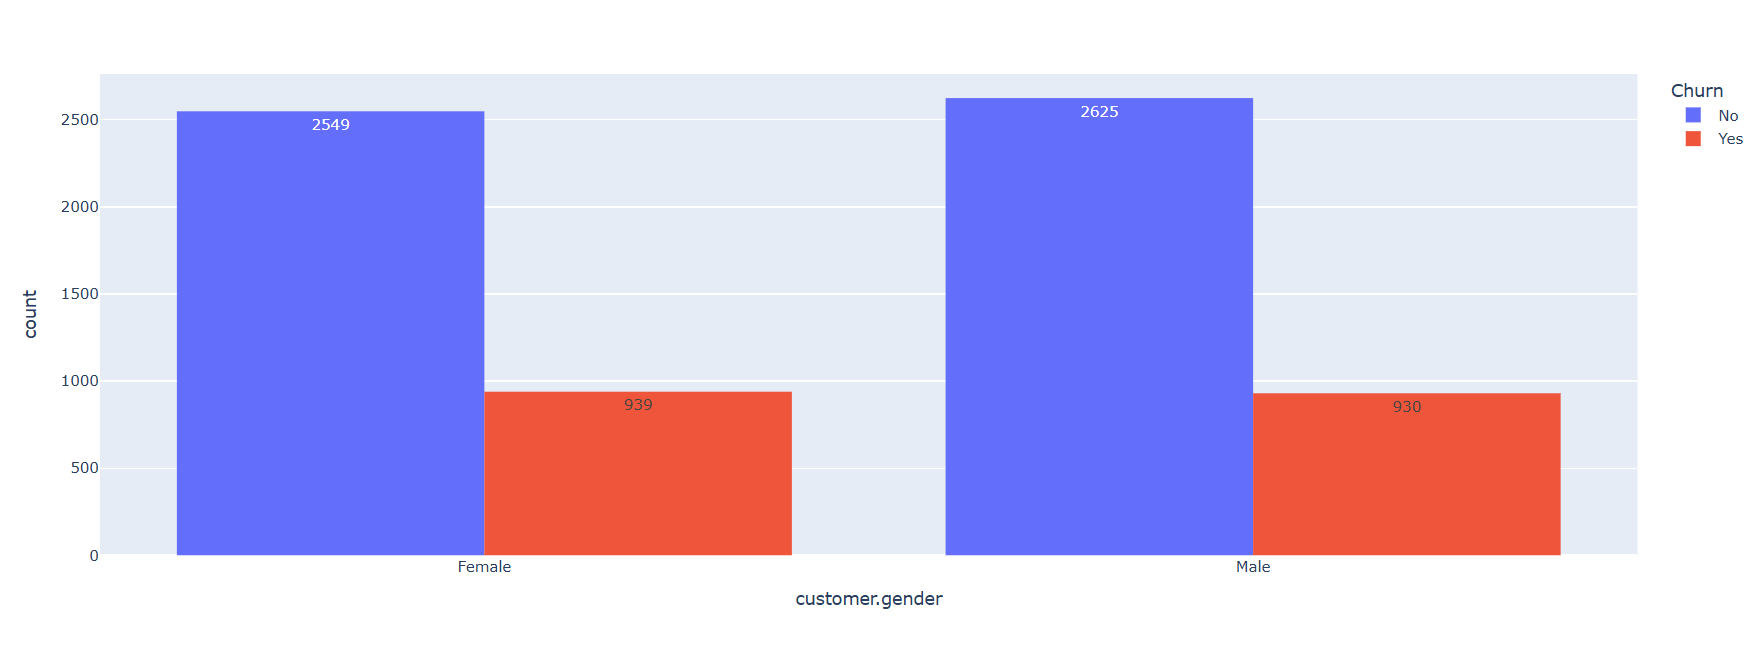

*   **Distribución de Churn por SeniorCitizen:** Se analizó la relación entre ser un ciudadano senior y la evasión.
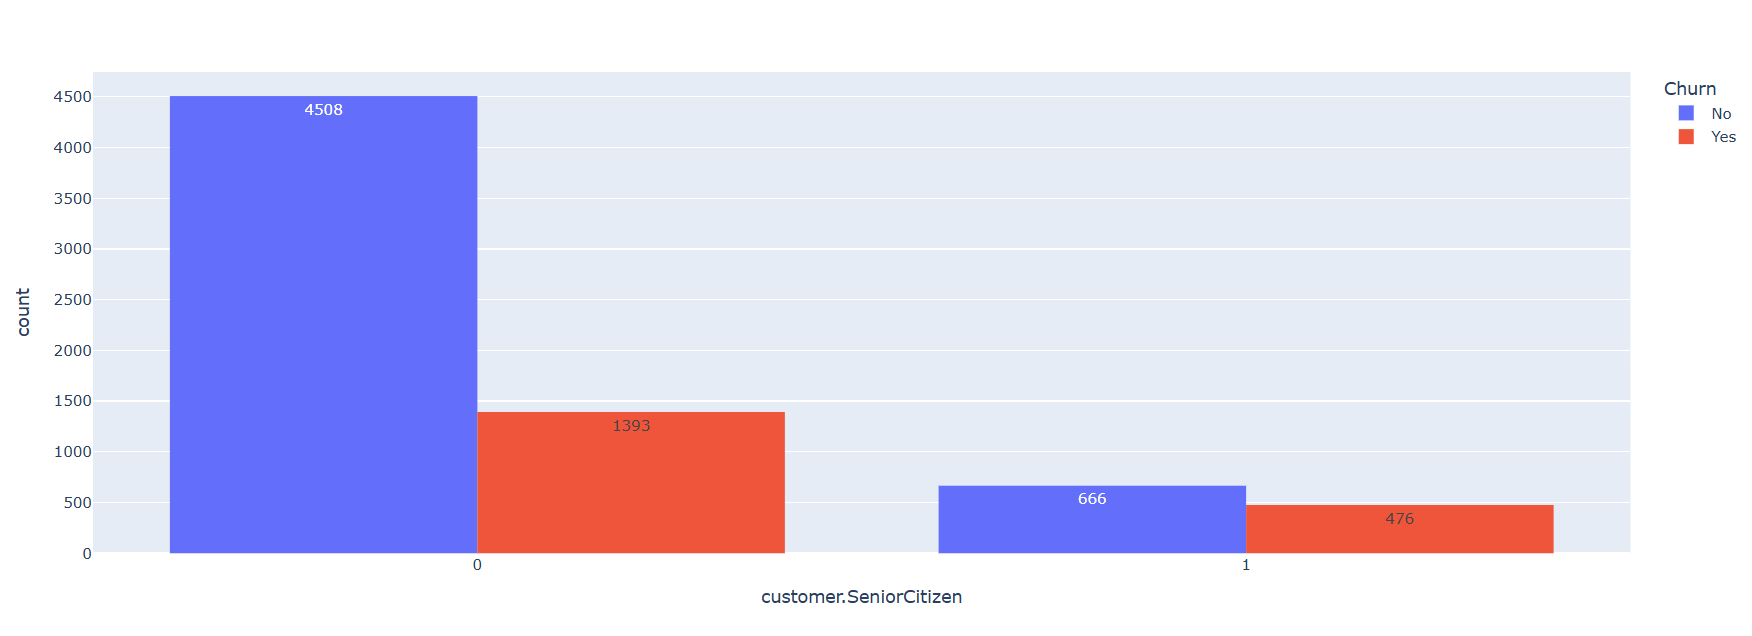

*   **Distribución de Churn por Tenure:** Se examinó la distribución de la evasión en función del tiempo que el cliente ha estado con la empresa.
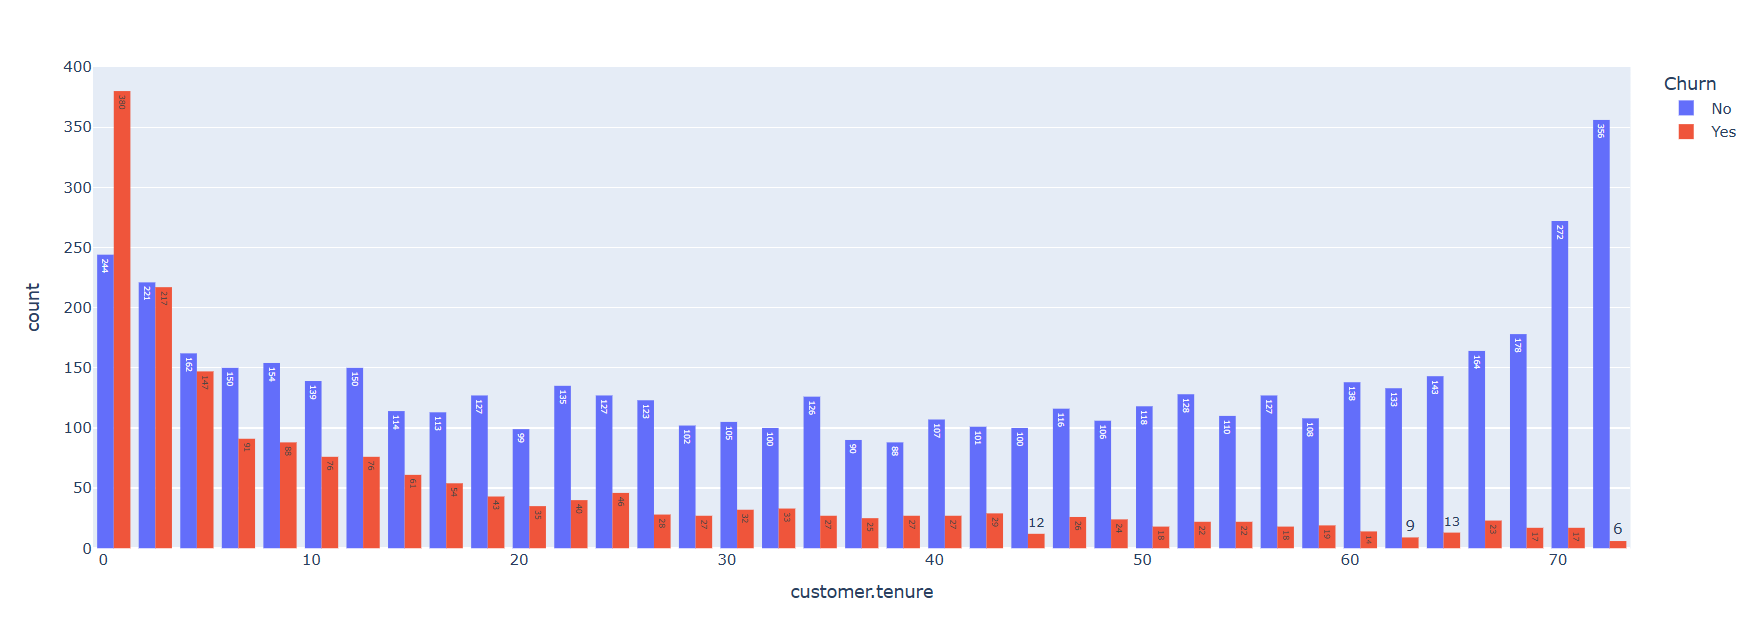

*   **Tasa de Churn por Tenure:** Se calculó y graficó la tasa de evasión para cada valor de `customer.tenure`, revelando una mayor tasa de churn en los primeros meses.
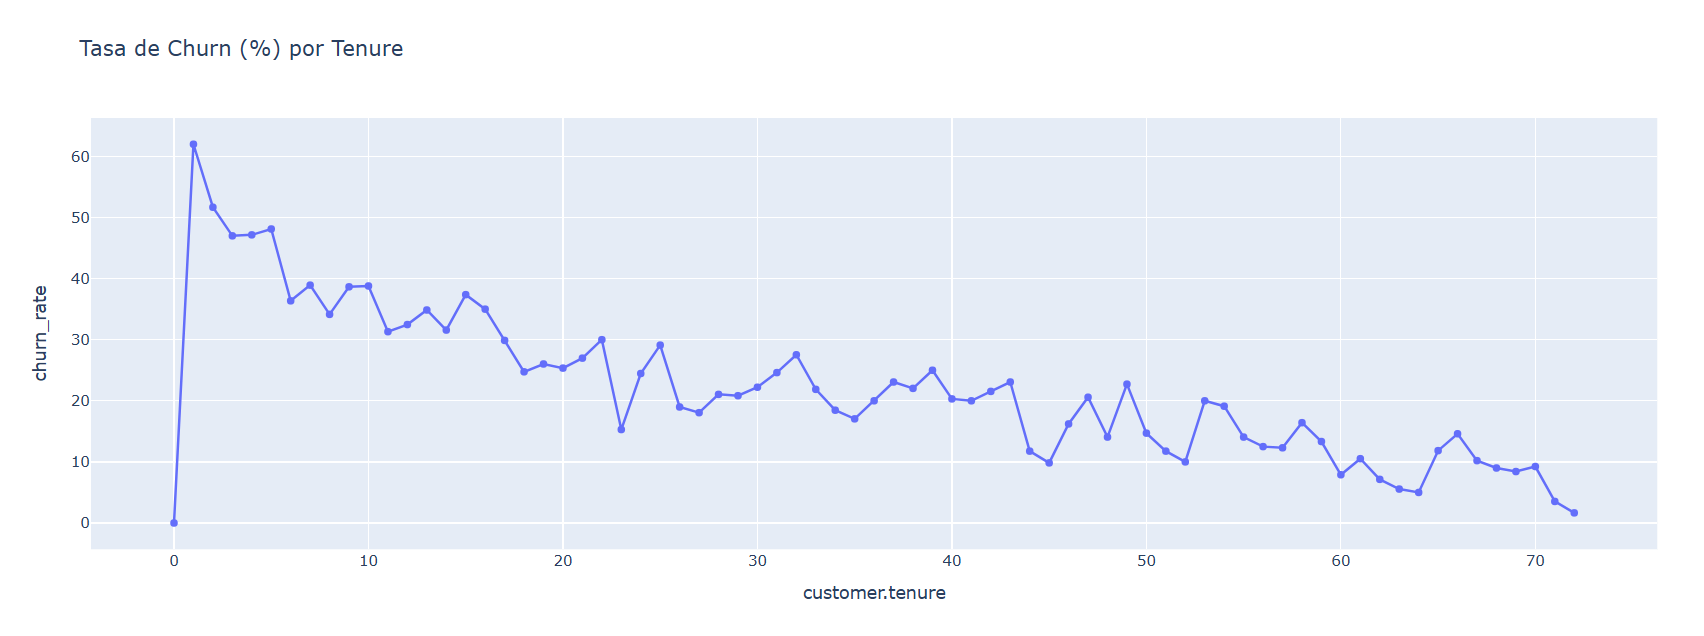

*   **Relación entre Tenure y Cargos Mensuales por Churn:** Se visualizó la relación entre el tiempo de permanencia, los cargos mensuales y la evasión, mostrando patrones interesantes.
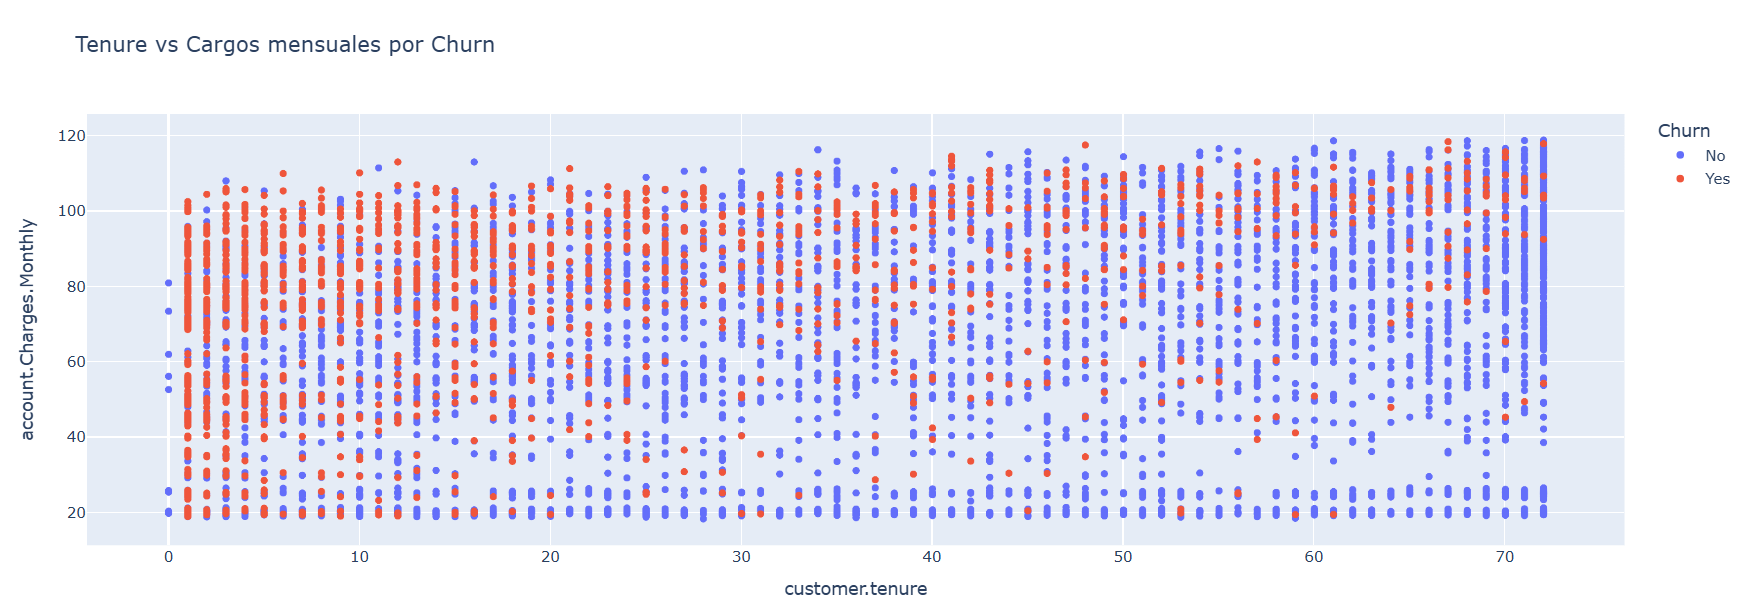

*   **Distribución de Churn por tipo de Contrato:** Se analizó cómo el tipo de contrato impacta en la tasa de evasión, destacando que los contratos mensuales tienen una mayor tasa de churn.
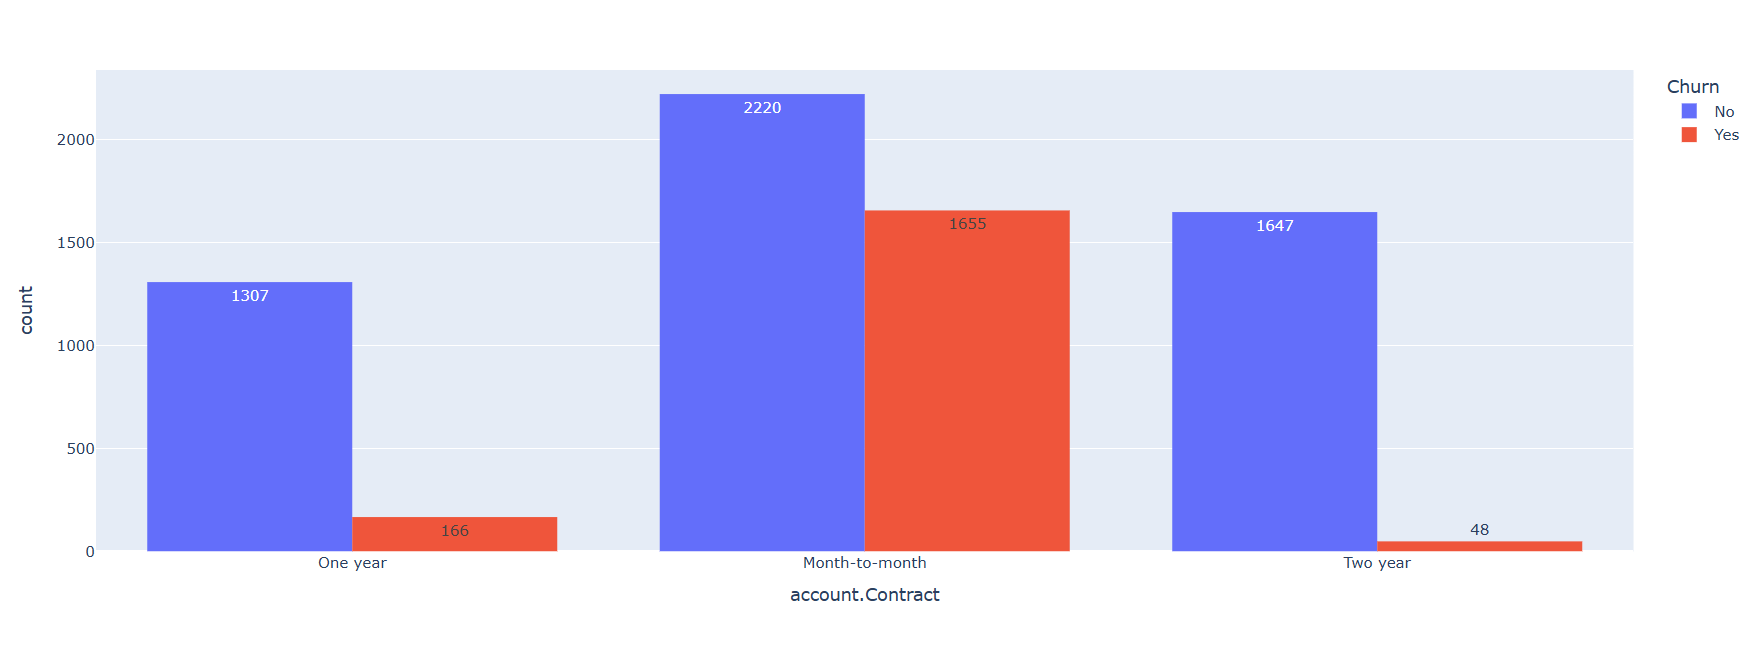

*   **Distribución de Cargos Mensuales por Churn:** Se utilizó un gráfico de caja para comparar la distribución de los cargos mensuales entre los clientes que evaden y los que no.
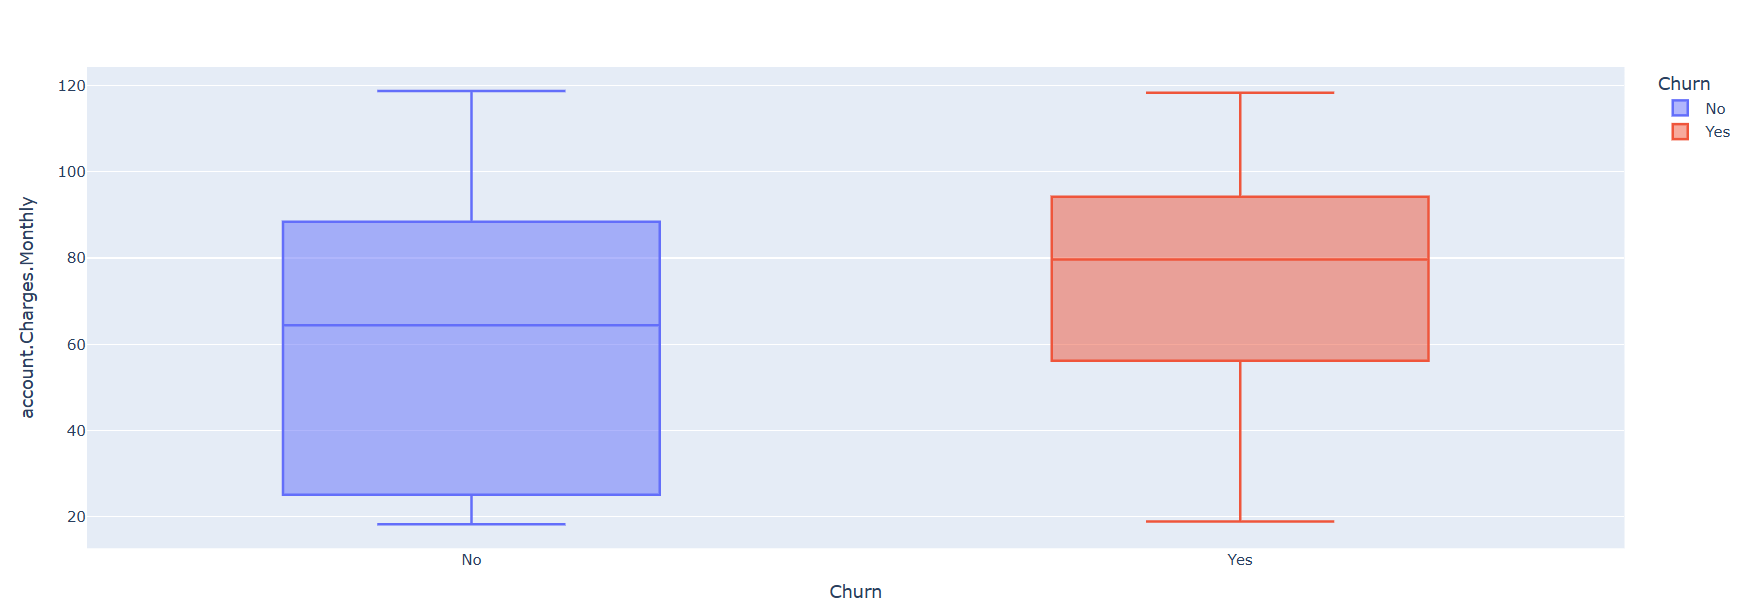

*   **Distribución de Churn por Servicio Telefónico:** Se examinó si tener servicio telefónico influye en la evasión.
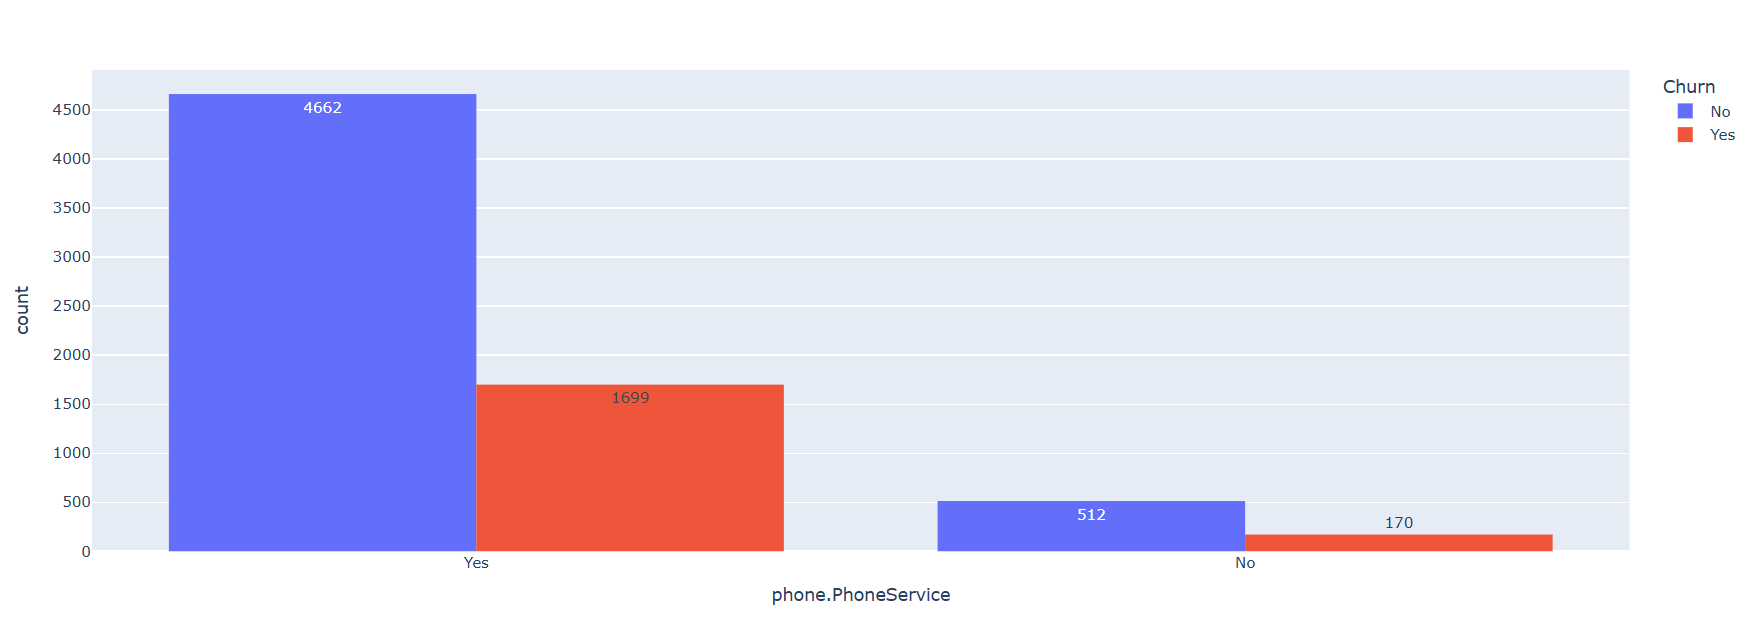

*   **Distribución de Churn por Servicio de Internet:** Se analizó cómo el tipo de servicio de internet se relaciona con la evasión, observando que la fibra óptica tiene una mayor tasa de churn.
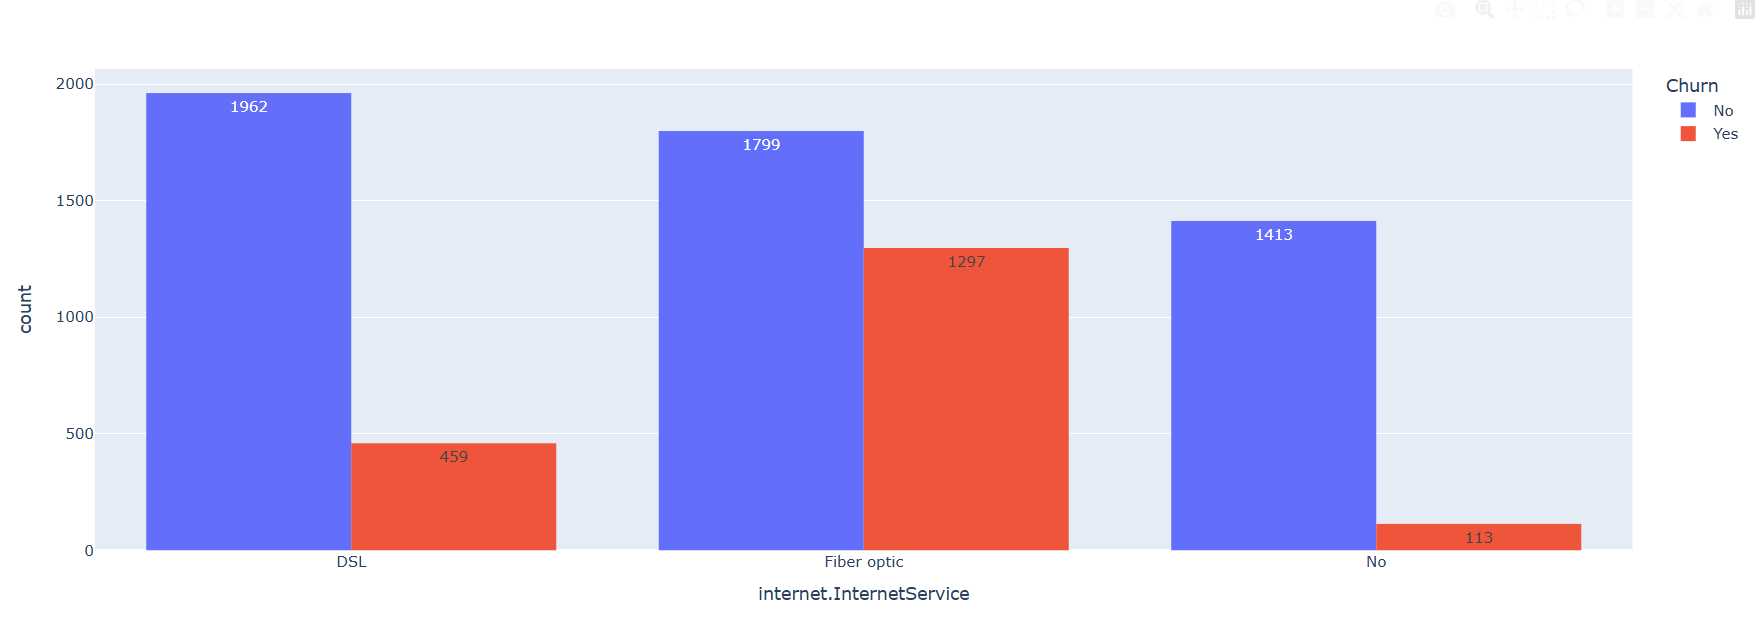

*   **Distribución de Churn por StreamingTV:** Se visualizó la relación entre tener servicio de StreamingTV y la evasión.
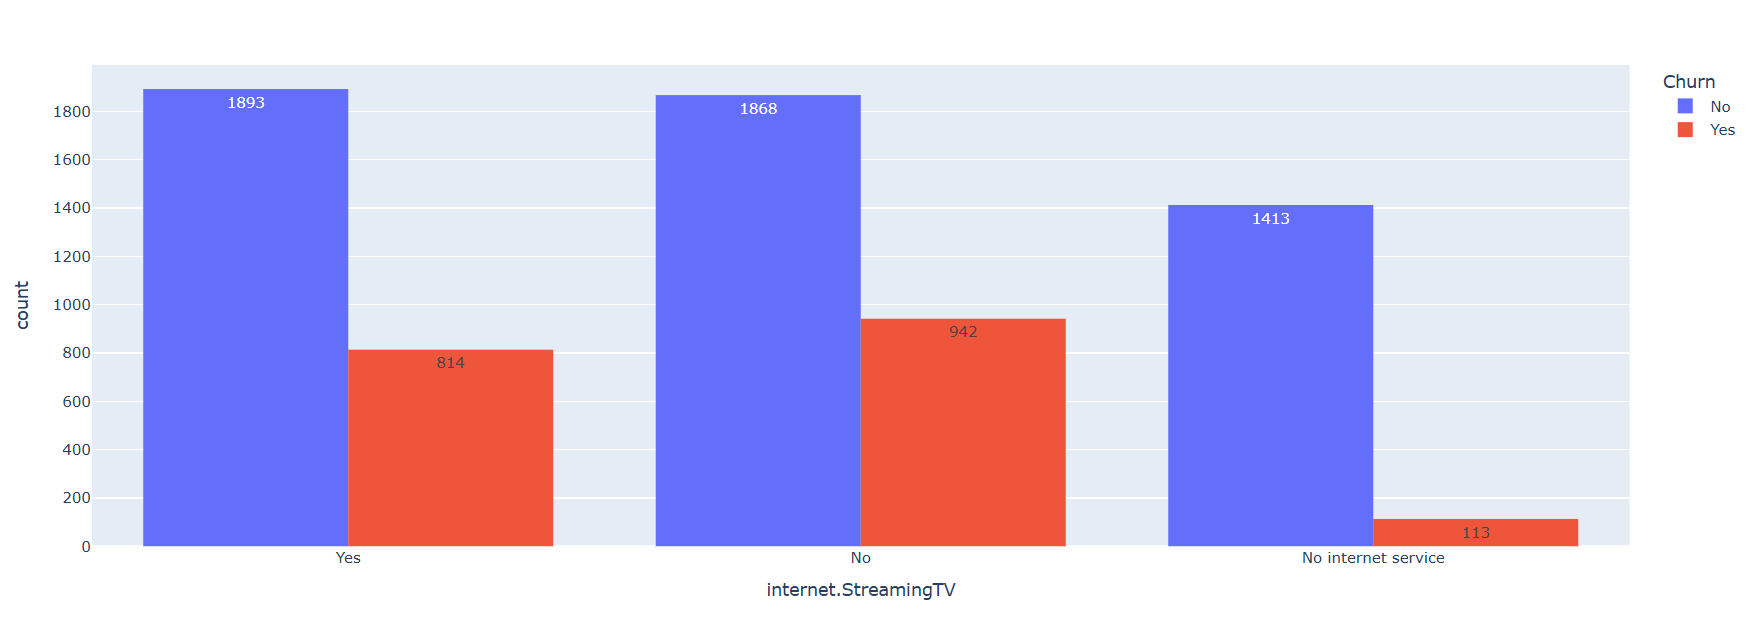

*   **Distribución de Churn por Método de Pago:** Se analizó cómo los diferentes métodos de pago se asocian con la evasión, indicando que el pago electrónico tiene una alta tasa de churn.
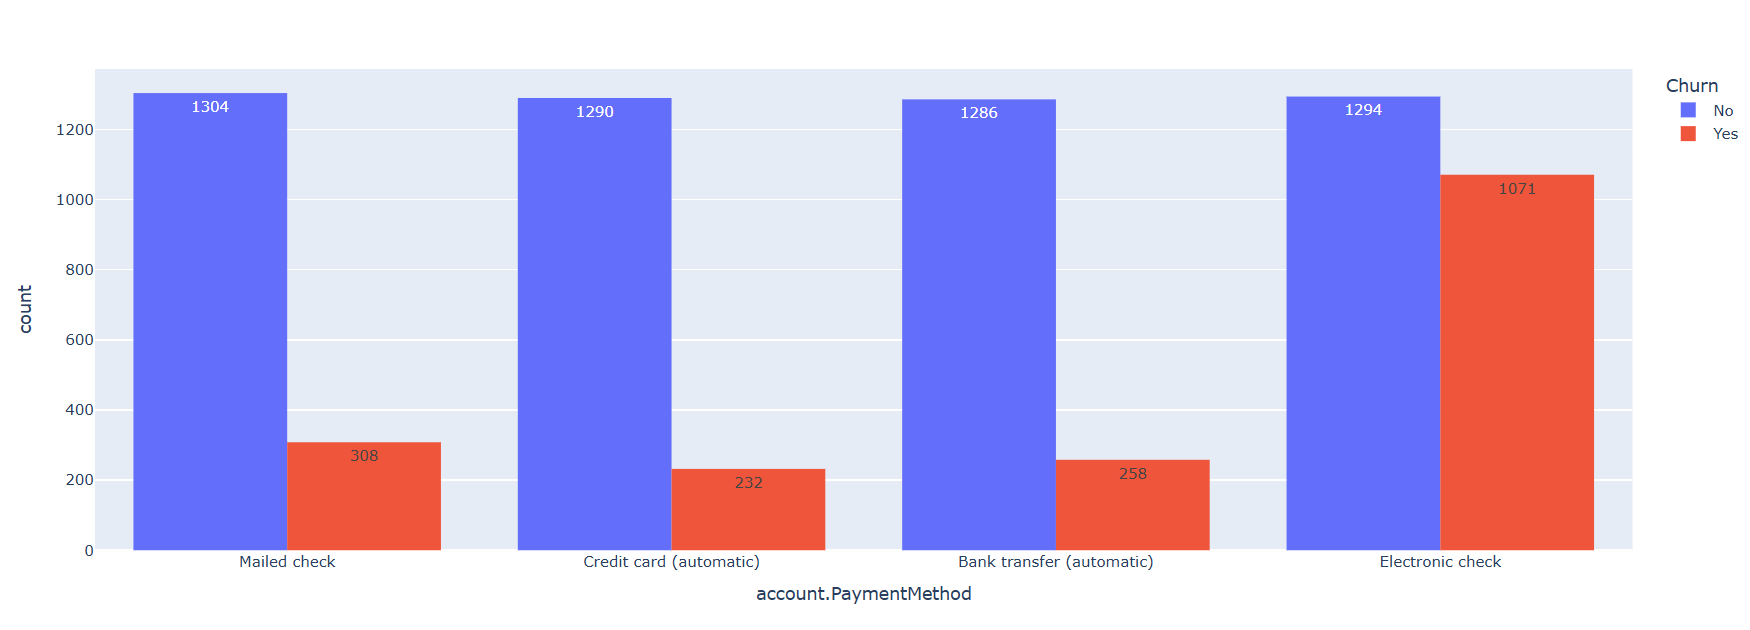

## 🔹 Conclusiones e Insights

Basado en el análisis exploratorio de datos, se identificaron los siguientes insights clave:

*   **Alta tasa de Churn en los primeros meses:** Los clientes con menor antigüedad (`customer.tenure`) tienen una probabilidad significativamente mayor de evadir. Esto sugiere que la experiencia inicial del cliente es crucial.
*   **Impacto del tipo de Contrato:** Los clientes con contratos mes a mes (`Month-to-month`) presentan una tasa de evasión mucho más alta en comparación con aquellos con contratos de uno o dos años.
*   **Influencia del Servicio de Internet:** Los clientes con servicio de Fibra Óptica (`Fiber optic`) tienen una mayor propensión a evadir que aquellos con DSL o sin servicio de internet. Esto podría estar relacionado con problemas de calidad del servicio o expectativas no cumplidas.
*   **Métodos de Pago y Churn:** El método de pago (`account.PaymentMethod`), especialmente el pago electrónico (`Electronic check`), está asociado con una mayor tasa de evasión.
*   **Cargos Mensuales:** Los clientes que evaden tienden a tener cargos mensuales (`account.Charges.Monthly`) más altos.

Estos hallazgos indican que la evasión no es un fenómeno aleatorio, sino que está influenciada por varios factores, incluyendo la antigüedad del cliente, el tipo de contrato, el servicio de internet y el método de pago.

## 🔹 Recomendaciones

Con base en los insights obtenidos, se proponen las siguientes recomendaciones estratégicas para reducir la evasión de clientes:

*   **Programas de bienvenida y retención temprana:** Implementar programas específicos para nuevos clientes durante sus primeros meses para asegurar una experiencia positiva y fortalecer la relación con la empresa.
*   **Incentivos para contratos a largo plazo:** Ofrecer descuentos o beneficios adicionales a los clientes que opten por contratos de uno o dos años para fomentar la permanencia.
*   **Mejorar la calidad del servicio de Fibra Óptica:** Investigar y abordar las posibles causas de la alta tasa de churn entre los clientes de fibra óptica, como problemas técnicos o insatisfacción con el rendimiento.
*   **Optimizar la experiencia de pago electrónico:** Analizar el proceso de pago electrónico para identificar posibles puntos de fricción o problemas que puedan estar contribuyendo a la evasión.
*   **Analizar la estructura de precios:** Evaluar si los cargos mensuales percibidos como altos están relacionados con la evasión y considerar opciones de planes más flexibles o transparentes.